In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from navi.utils.labels import load_label_map, vector_to_intervals

In [6]:
mapping = pd.read_csv("/home/ppoitier/Documents/dev/university/navi_lstm/data/maps/mapping_test.csv")
label_map = load_label_map("/run/media/ppoitier/ppoitier/datasets/navi/test/labels/predictions_test.json")
mapping

,id,directory
0,id_x1,Londero 19042022 - 20220107-160703531
1,id_x2,Loppe 15122022 - 20221215-113843662
2,id_x3,Prata 13102022 - Rien d'anormal
3,id_x4,20230525-090005917_MIN.PROBE18-020-080004 - 20...
4,id_x5,20230907-111125510_MIN.PROBE18-020-080004 - 20...


In [18]:
def load_video_targets(video_id: str, label_map):
    return np.array([f['label'] for f in label_map[video_id]], dtype='int32')

target_vector = load_video_targets('id_x2', label_map)
target_intervals = vector_to_intervals(target_vector)
target_intervals

[(78, 87),
 (93, 97),
 (164, 173),
 (354, 373),
 (388, 437),
 (497, 601),
 (606, 607),
 (710, 748),
 (1795, 1827),
 (1961, 2009),
 (2701, 2720),
 (2787, 2994),
 (3143, 3150),
 (3209, 3210)]

In [29]:
resnet_results = pd.read_csv("/run/media/ppoitier/ppoitier/pierre_disque/output_5_videos_tests/vresnet/id_x2/data_frame_output.csv")
resnet_probabilities = resnet_results['prob_avg'].values
resnet_predictions = (resnet_probabilities > 0.5).astype('int32')
resnet_intervals = vector_to_intervals(resnet_predictions)
resnet_intervals

[(6, 6),
 (14, 14),
 (65, 65),
 (68, 68),
 (70, 72),
 (74, 75),
 (77, 91),
 (97, 100),
 (103, 103),
 (105, 105),
 (107, 107),
 (114, 114),
 (118, 119),
 (121, 121),
 (143, 143),
 (147, 147),
 (149, 149),
 (155, 155),
 (158, 160),
 (162, 163),
 (165, 165),
 (167, 173),
 (177, 177),
 (179, 179),
 (181, 185),
 (187, 189),
 (191, 191),
 (207, 207),
 (242, 243),
 (248, 248),
 (253, 253),
 (288, 288),
 (350, 351),
 (353, 356),
 (361, 362),
 (365, 365),
 (367, 367),
 (369, 370),
 (373, 373),
 (375, 379),
 (382, 384),
 (392, 394),
 (396, 396),
 (398, 400),
 (402, 411),
 (413, 413),
 (415, 416),
 (419, 422),
 (424, 425),
 (427, 427),
 (429, 431),
 (434, 436),
 (438, 438),
 (495, 504),
 (506, 506),
 (508, 509),
 (511, 511),
 (517, 521),
 (523, 523),
 (525, 535),
 (537, 538),
 (540, 543),
 (545, 546),
 (548, 556),
 (558, 562),
 (564, 566),
 (570, 572),
 (575, 575),
 (578, 578),
 (580, 581),
 (587, 587),
 (592, 593),
 (600, 600),
 (603, 603),
 (607, 607),
 (609, 609),
 (615, 615),
 (620, 622),
 (6

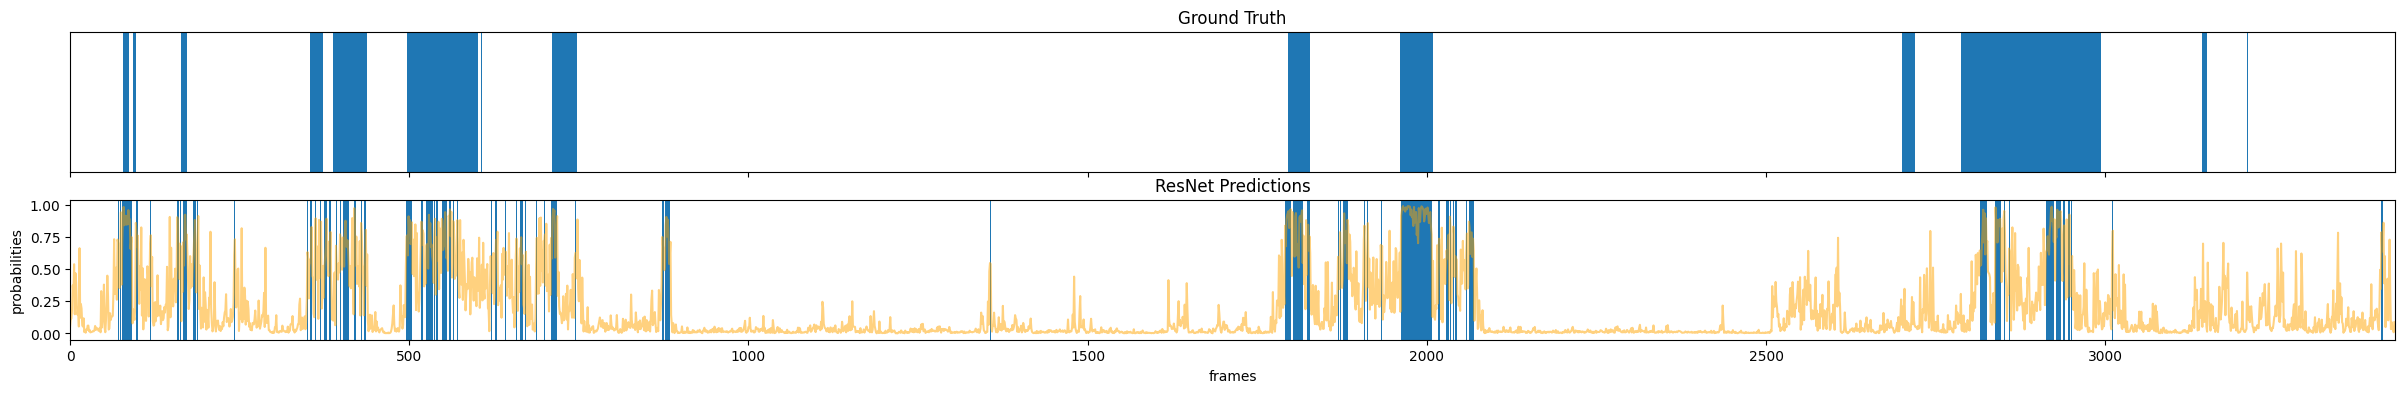

In [43]:
fig, axes = plt.subplots(2, 1, figsize=(30, 4), sharex=True)

axes[0].set_xlim(0, len(target_vector))
for start, end in target_intervals:
    axes[0].axvspan(start, end, 0, 1)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title("Ground Truth")

axes[1].set_xlim(0, len(target_vector))
for start, end in resnet_intervals:
    axes[1].axvspan(start, end, 0, 1)
axes[1].plot(resnet_probabilities, color='orange', alpha=0.5)
axes[1].set_ylabel("probabilities")
axes[1].set_xlabel("frames")
axes[1].set_title("ResNet Predictions")

fig.savefig('test.pdf')